In [2]:
import numpy as np
import pandas as pd
import sklearn as sk
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold
from sklearn.tree import export_graphviz
from six import StringIO
from IPython.display import Image  
import pydotplus
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import cohen_kappa_score, make_scorer
df = pd.read_csv("data/train.csv")
df_transformed = pd.read_csv("data/transformed_data.csv")
kappa_scorer = make_scorer(cohen_kappa_score,weights='quadratic')

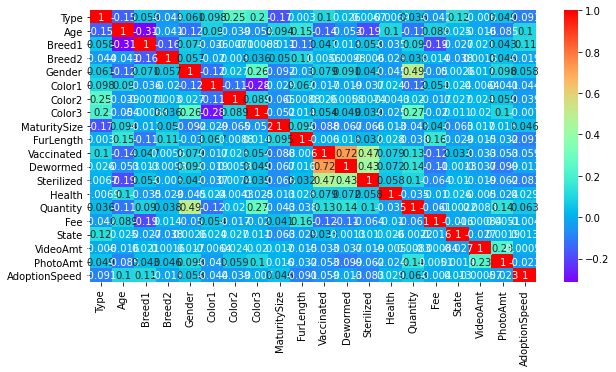

,Type,Age,Breed1,Breed2,Gender,Color1,Color2,Color3,MaturitySize,FurLength,Vaccinated,Dewormed,Sterilized,Health,Quantity,Fee,State,VideoAmt,PhotoAmt,AdoptionSpeed
count,14993.000000,14993.000000,14993.000000,14993.000000,14993.000000,14993.000000,14993.000000,14993.000000,14993.000000,14993.000000,14993.000000,14993.000000,14993.000000,14993.000000,14993.000000,14993.000000,14993.000000,14993.000000,14993.000000,14993.000000
mean,1.457614,10.452078,265.272594,74.009738,1.776162,2.234176,3.222837,1.882012,1.862002,1.467485,1.731208,1.558727,1.914227,1.036617,1.576069,21.259988,41346.028347,0.056760,3.889215,2.516441
std,0.498217,18.155790,60.056818,123.011575,0.681592,1.745225,2.742562,2.984086,0.547959,0.599070,0.667649,0.695817,0.566172,0.199535,1.472477,78.414548,32.444153,0.346185,3.487810,1.177265
min,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,41324.000000,0.000000,0.000000,0.000000
25%,1.000000,2.000000,265.000000,0.000000,1.000000,1.000000,0.000000,0.000000,2.000000,1.000000,1.000000,1.000000,2.000000,1.000000,1.000000,0.000000,41326.000000,0.000000,2.000000,2.000000
50%,1.000000,3.000000,266.000000,0.000000,2.000000,2.000000,2.000000,0.000000,2.000000,1.000000,2.000000,1.000000,2.000000,1.000000,1.000000,0.000000,41326.000000,0.000000,3.000000,2.000000
75%,2.000000,12.000000,307.000000,179.000000,2.000000,3.000000,6.000000,5.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,1.000000,0.000000,41401.000000,0.000000,5.000000,4.000000
max,2.000000,255.000000,307.000000,307.000000,3.000000,7.000000,7.000000,7.000000,4.000000,3.000000,3.000000,3.000000,3.000000,3.000000,20.000000,3000.000000,41415.000000,8.000000,30.000000,4.000000


In [69]:
#initial eda
plt.figure(figsize = (10,5))
sns.heatmap(df.corr(), annot = True, cmap="rainbow")
plt.show()
df.describe()


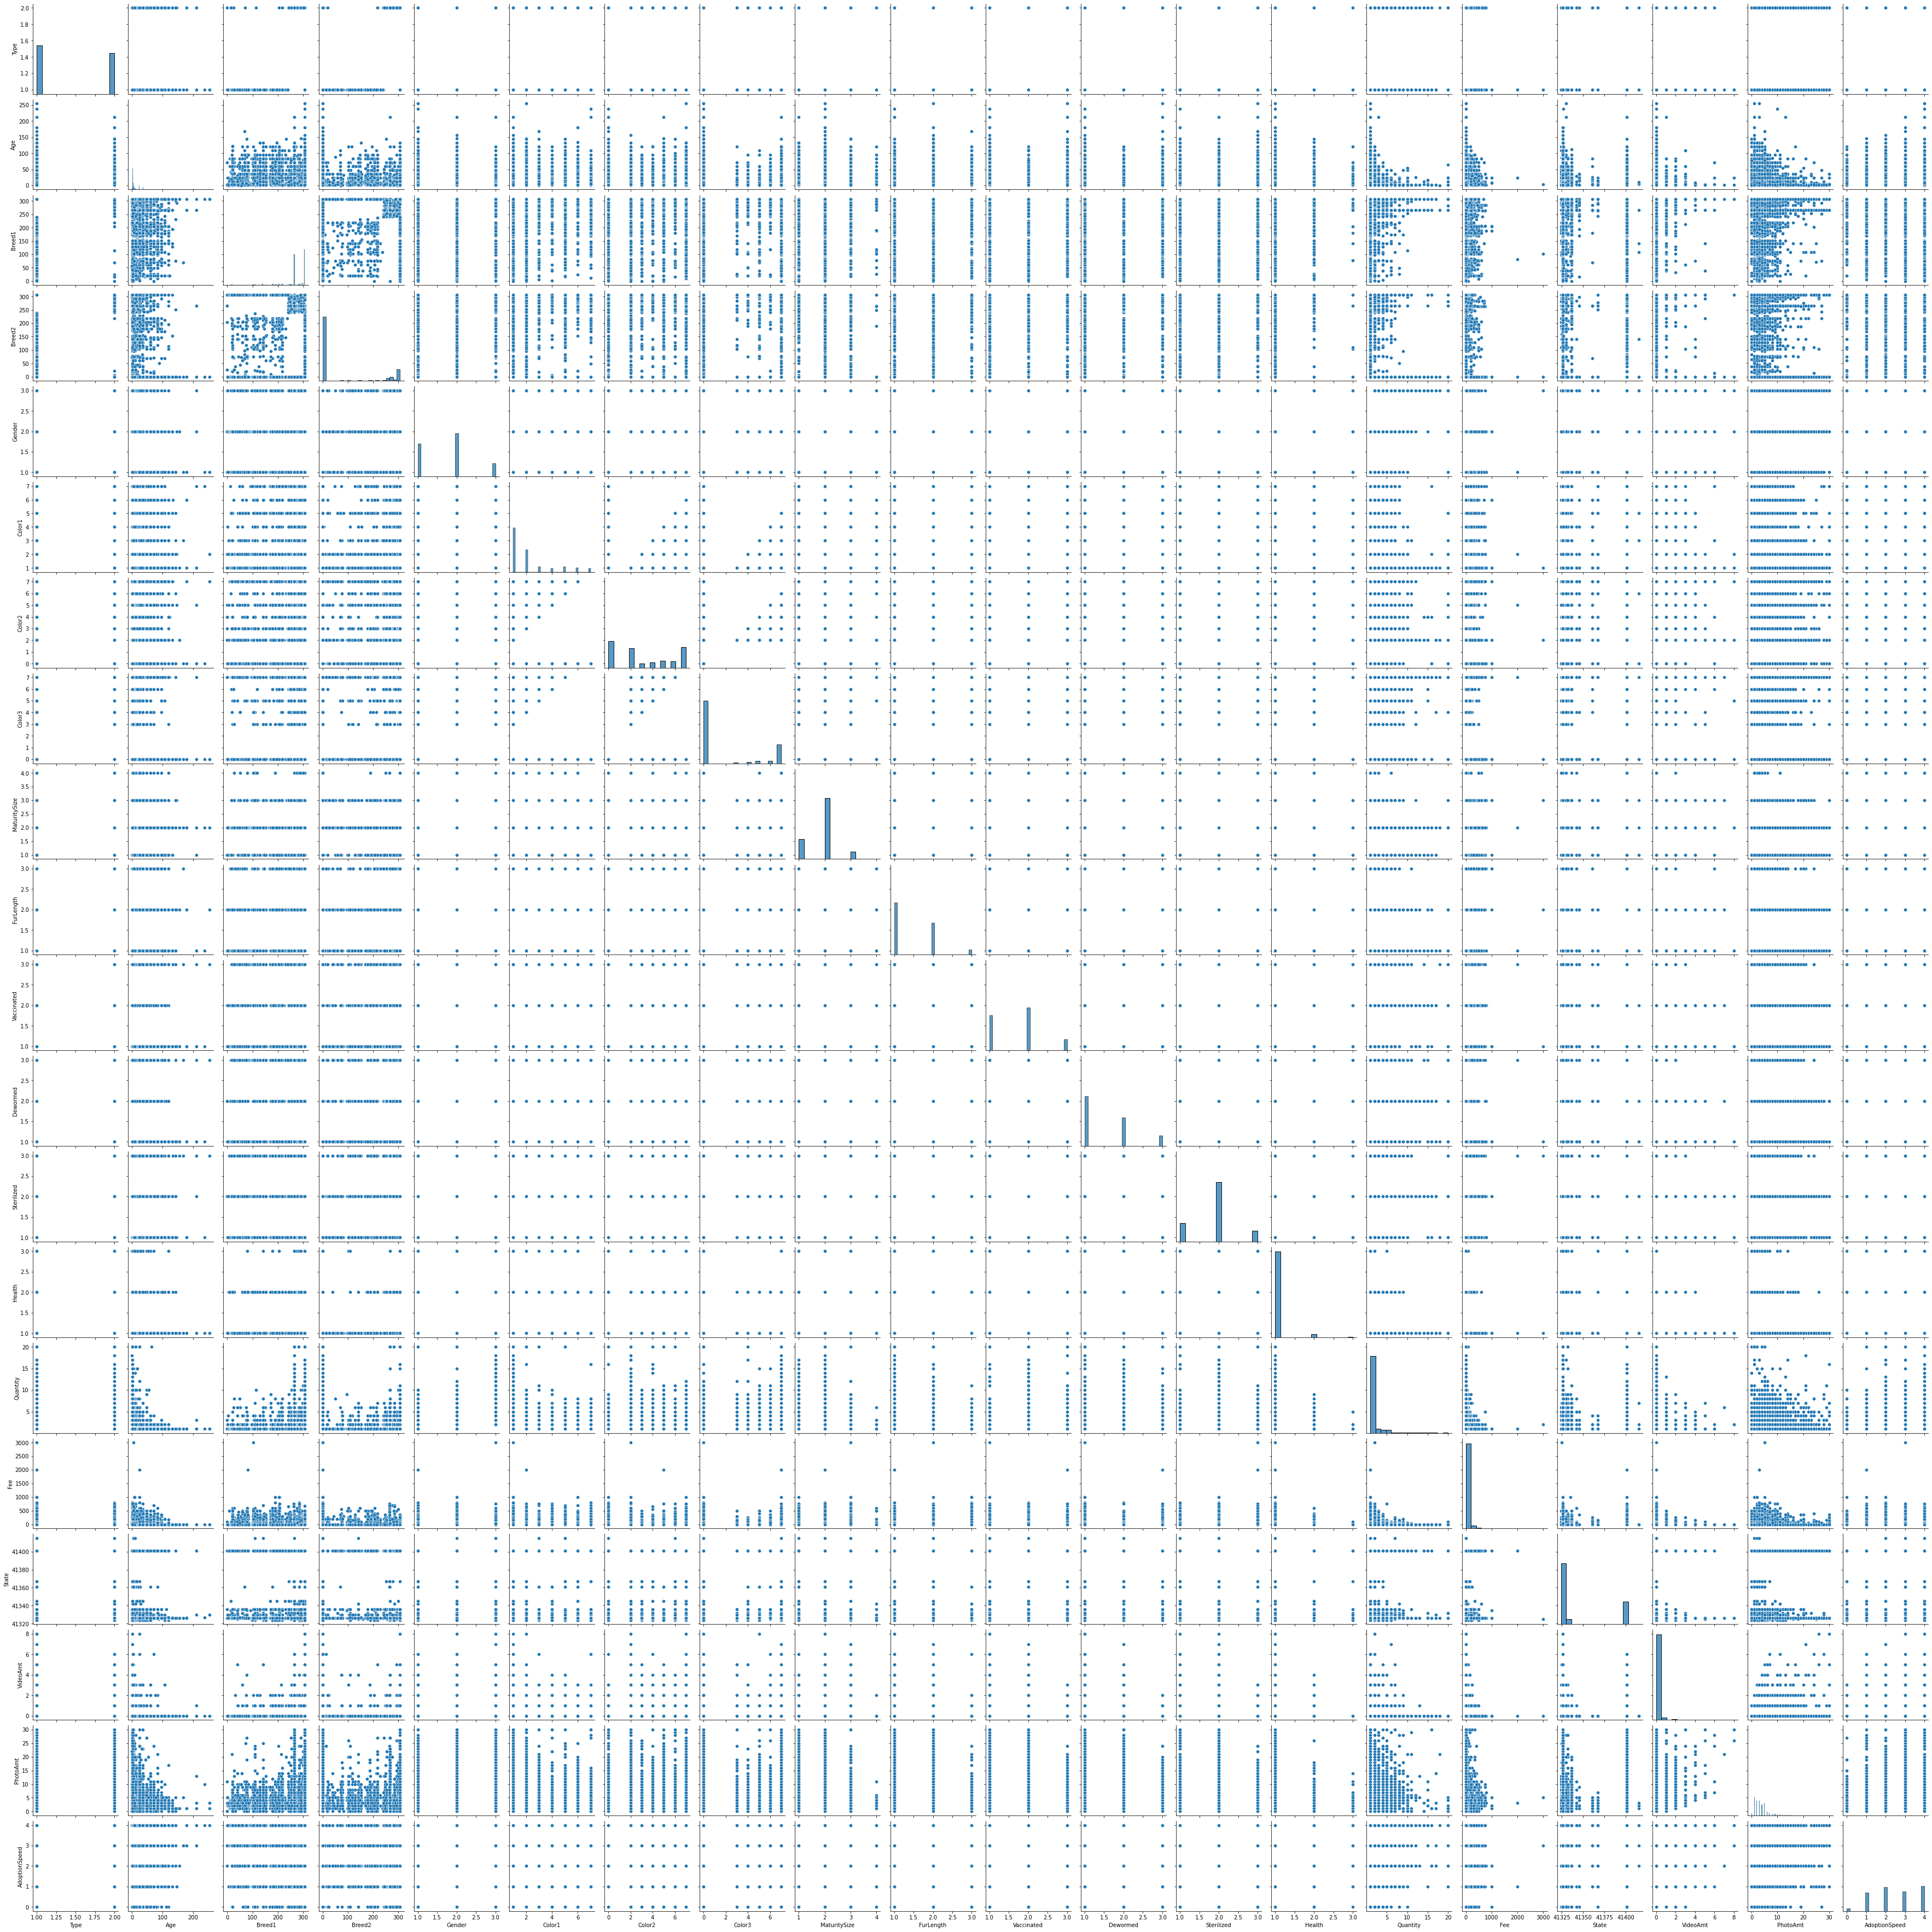

In [12]:
sns.pairplot(df)

## One-hot encoded data

In [3]:
###minor data preparation
df_transformed=df_transformed.drop(columns=['Unnamed: 0'])
df_transformed['Name'] = df_transformed['Name'].fillna(0)
df_transformed.loc[df_transformed.Name != 0, "Name"] = 1
df_transformed.drop(columns=['RescuerID','Description','PetID','Fee','Breed1Name','Breed2Name','Color1Name','Color2Name','Color3Name','StateName','Breed1_Breed2','Breed1Name_Breed2Name','Color1_Color2_Color3','Color1Name_Color2Name_Color3Name'],inplace=True)

In [4]:
df_transformed

,Name,Age,Quantity,VideoAmt,PhotoAmt,AdoptionSpeed,RescuerID_Count,is_age_0_3,is_age_3_6,is_age_6_12,...,Color2_2,Color2_3,Color2_4,Color2_5,Color2_6,Color3_3,Color3_4,Color3_5,Color3_6,Color3_7
0,1,1,1,0,7.0,1,12,1,0,0,...,0,1,0,0,0,0,0,1,0,0
1,1,2,1,0,5.0,1,12,1,0,0,...,1,0,0,0,0,0,0,1,0,0
2,1,1,1,0,5.0,0,12,1,0,0,...,0,1,0,0,0,0,0,0,0,1
3,1,2,1,0,5.0,0,12,1,0,0,...,0,1,0,0,0,0,0,0,0,1
4,1,1,1,0,5.0,1,12,1,0,0,...,0,1,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1352,1,1,1,0,6.0,1,1,1,0,0,...,0,0,1,0,0,0,0,0,0,1
1353,1,11,2,0,1.0,4,1,0,0,1,...,1,0,0,0,0,0,0,0,0,1
1354,1,1,9,0,5.0,2,1,1,0,0,...,1,0,0,0,0,0,0,0,0,1
1355,1,3,1,0,3.0,0,1,1,0,0,...,0,0,0,0,1,0,0,0,0,1


In [5]:
df_transformed["Name"] = df_transformed["Name"].astype(str).astype(int)

In [6]:
df_transformed.dtypes

Name          int32
Age           int64
Quantity      int64
VideoAmt      int64
PhotoAmt    float64
             ...   
Color3_3      int64
Color3_4      int64
Color3_5      int64
Color3_6      int64
Color3_7      int64
Length: 253, dtype: object

In [7]:
#getting train and test sets
Y_tr = df_transformed["AdoptionSpeed"]
X_tr = df_transformed.drop(columns=["AdoptionSpeed"])
X_train, X_test, y_train, y_test = train_test_split(X_tr, Y_tr, test_size=0.3,random_state=4,stratify=Y_tr)

In [143]:
#fitting simple decision tree using grid search with CV
param_grid = {'max_depth':range(1,10),  
              'criterion': ['gini','entropy'], 
              'max_features':range(1,250)}
clf = GridSearchCV(tree.DecisionTreeClassifier(), param_grid,cv=5,n_jobs=4,scoring=kappa_scorer)
clf.fit(X_train,y_train)
tree_model = clf.best_estimator_
print("CV Quadratic Kappa Score:",clf.best_score_)
print("Best parameters:",clf.best_params_)

CV Quadratic Kappa Score: 0.2571745851083101
Best parameters: {'criterion': 'gini', 'max_depth': 5, 'max_features': 40}


In [144]:
#calculating kappa score on test data
y_pred = clf.predict(X_test)
print("Test set Quadratic Kappa Score:",cohen_kappa_score(y_test,y_pred,weights='quadratic'))

Test set Quadratic Kappa Score: 0.18177964749798314


In [145]:
#fit RF with grid search and Cross Validation
param_grid = {'bootstrap': [True],
              'max_depth': [1,5,10,30,50,70,100],
              'max_features': ['auto', 'sqrt', 'log2'],
              'n_estimators': [50,100, 200, 300,600],
              'criterion':['gini','entropy']}
clf = GridSearchCV(RandomForestClassifier(), param_grid,cv=5,n_jobs=4,scoring=kappa_scorer)
clf.fit(X_train,y_train)
print("CV Quadratic Kappa Score:",clf.best_score_)
print("Best parameters:",clf.best_params_)

CV Quadratic Kappa Score: 0.258146683667633
Best parameters: {'bootstrap': True, 'criterion': 'gini', 'max_depth': 10, 'max_features': 'log2', 'n_estimators': 300}


In [146]:
#calculating kappa score on test data
y_pred = clf.predict(X_test)
print("Test set Quadratic Kappa Score:",cohen_kappa_score(y_test,y_pred,weights='quadratic'))

Test set Quadratic Kappa Score: 0.2741419765844407


No handles with labels found to put in legend.


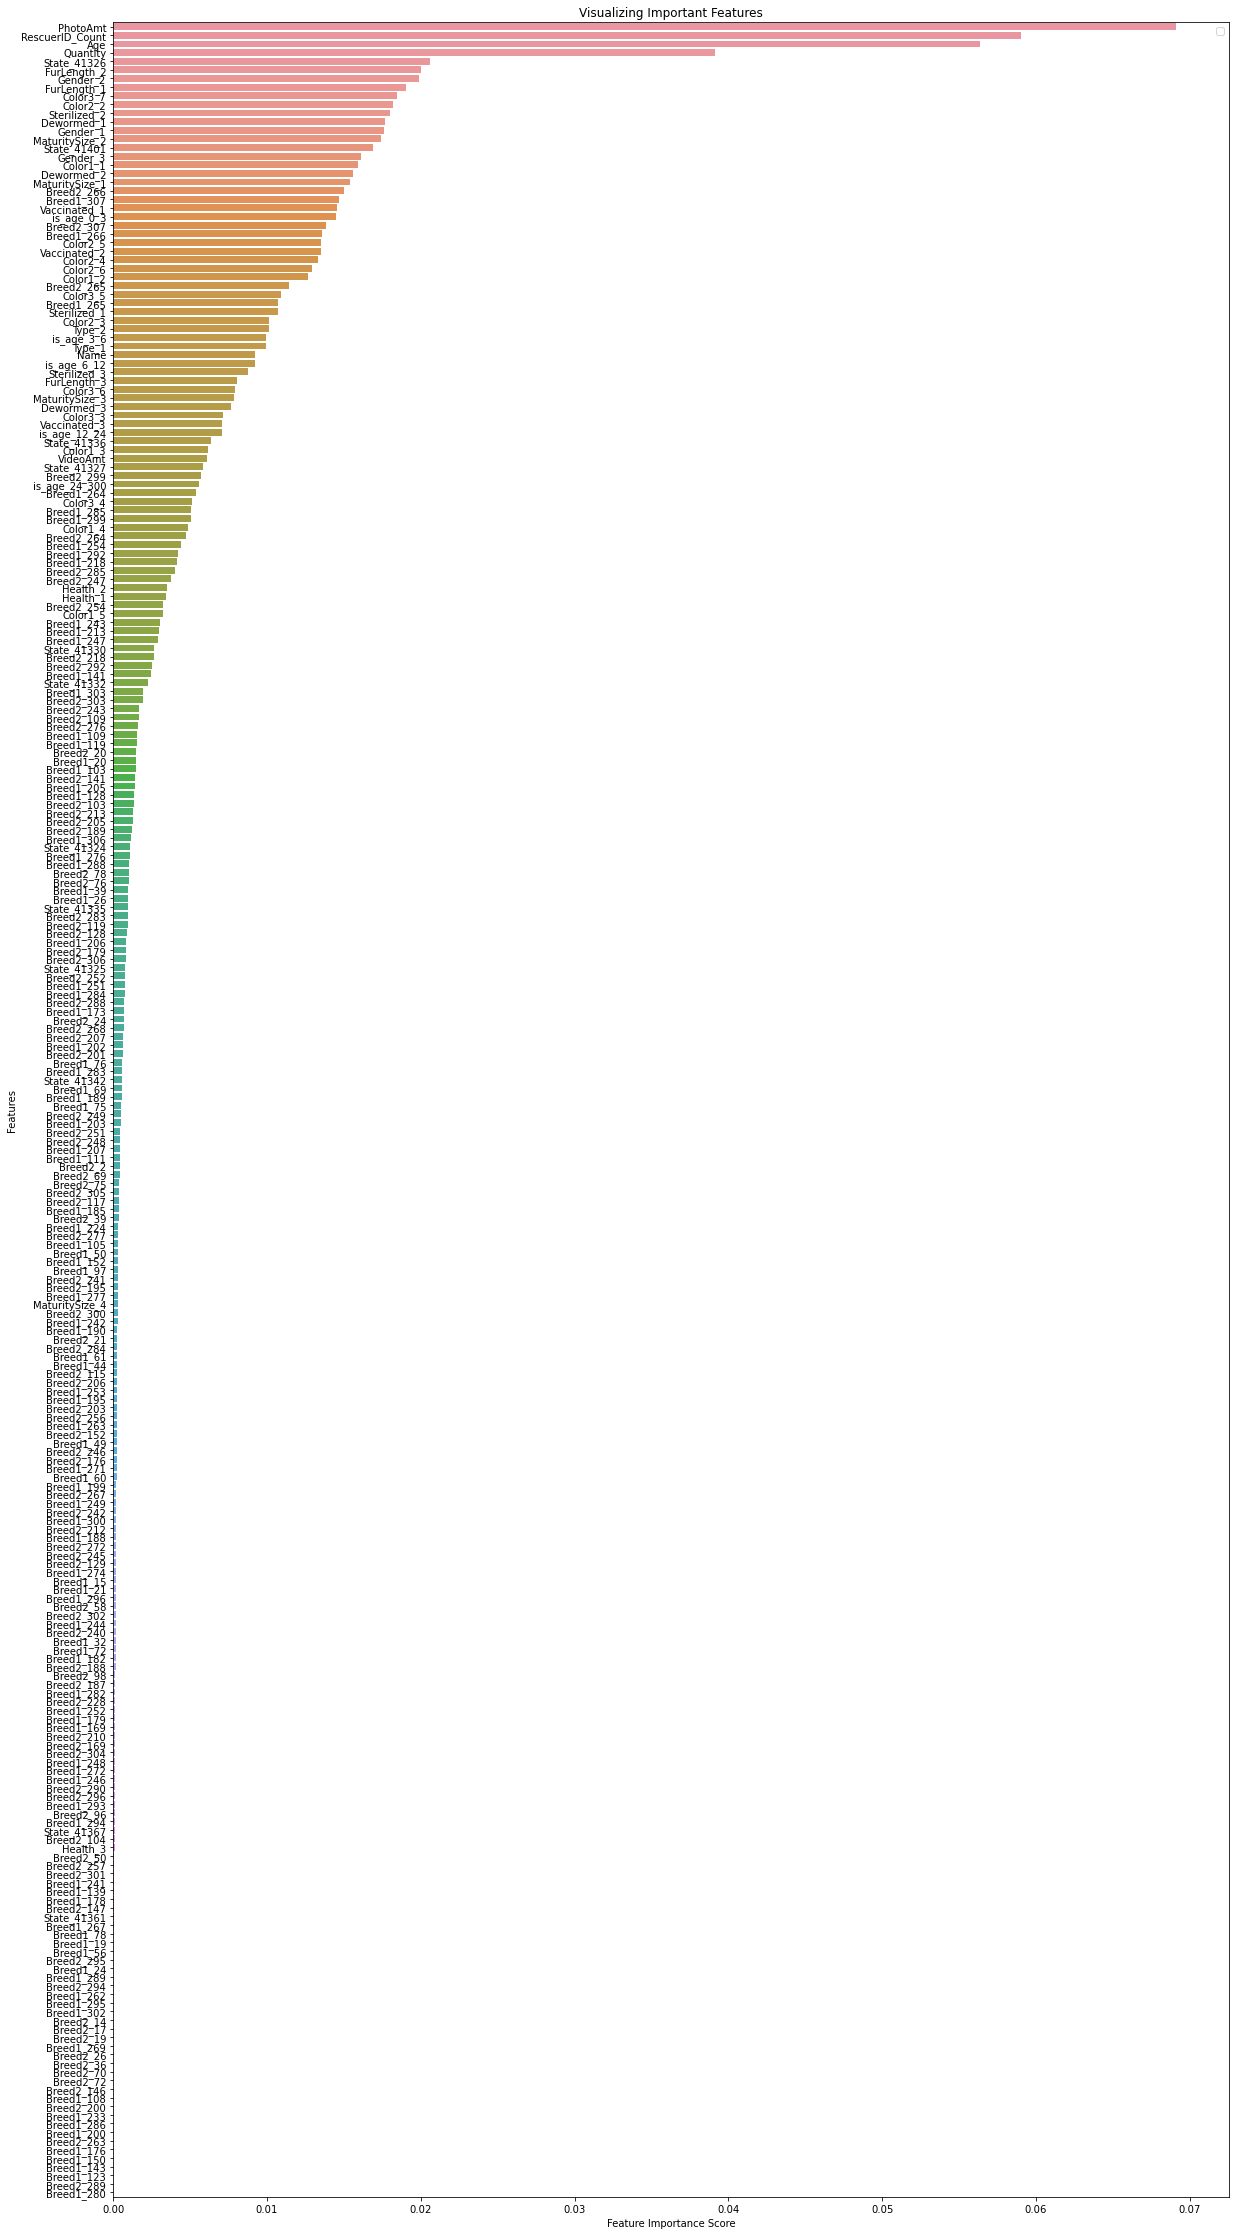

In [147]:
#refitting model with best params and plotting feature importance
clf = RandomForestClassifier(bootstrap=True,criterion='entropy',max_depth=30,max_features='sqrt',n_estimators=200)
clf.fit(X_train,y_train)
feature_names = list(X_tr.columns)

feature_imp = pd.Series(clf.feature_importances_,index=feature_names).sort_values(ascending=False)
%matplotlib inline
plt.figure(figsize=(20,40))
sns.barplot(x=feature_imp, y=feature_imp.index)
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.legend()
plt.show()

***PhotoAmt,Age,RescuerID_Count and Quantity seem to be the most important. Try fitting a simple regression tree/RF with only those variables. We have to bear in mind that random forests are bias towards features with more levels.***

In [83]:
#data prep for simple tree with 4 features
df_simple = df_transformed[["PhotoAmt", "Age","RescuerID_Count","Quantity","AdoptionSpeed"]]
Ysimple = df_simple["AdoptionSpeed"]
Xsimple = df_simple.drop(columns=["AdoptionSpeed"])
X_train, X_test, y_train, y_test = train_test_split(Xsimple, Ysimple, test_size=0.3,random_state=4,stratify=Ysimple)

In [84]:
#fit decision tree simple with 4 features
param_grid = {'max_depth':range(3,10),  
              'criterion': ['gini','entropy'], 
              'max_features':range(1,5)}
clf = GridSearchCV(tree.DecisionTreeClassifier(), param_grid,cv=5,n_jobs=4,scoring=kappa_scorer)
clf.fit(X_train,y_train)
tree_model = clf.best_estimator_
print("CV Quadratic Kappa Score:",clf.best_score_)
print("Best parameters:",clf.best_params_) 

CV Quadratic Kappa Score: 0.18222123079297015
Best parameters: {'criterion': 'gini', 'max_depth': 6, 'max_features': 4}


In [87]:
#calculating kappa score on test data
y_pred = clf.predict(X_test)
print("Test set Quadratic Kappa Score:",cohen_kappa_score(y_test,y_pred,weights='quadratic'))

Test set Quadratic Kappa Score: 0.2006345297850174


In [88]:
#fit RF simple with Cross Validation
param_grid = {'bootstrap': [True],
              'max_depth': [1,5,10,30,50,70,100],
              'max_features': ['auto', 'sqrt', 'log2'],
              'n_estimators': [50,100, 200, 300,600],
              'criterion':['gini','entropy']}
clf = GridSearchCV(RandomForestClassifier(), param_grid,cv=5,n_jobs=4,scoring=kappa_scorer)
clf.fit(X_train,y_train)
print("CV Quadratic Kappa Score:",clf.best_score_)
print("Best parameters:",clf.best_params_)

CV Quadratic Kappa Score: 0.19587948263310825
Best parameters: {'bootstrap': True, 'criterion': 'gini', 'max_depth': 5, 'max_features': 'auto', 'n_estimators': 200}


In [89]:
#calculating kappa score on test data
y_pred = clf.predict(X_test)
print("Test set Quadratic Kappa Score:",cohen_kappa_score(y_test,y_pred,weights='quadratic'))

Test set Quadratic Kappa Score: 0.19223916056226487


***Fitting both simple decision trees and RF to important features yields worse results, but not by much.*** 

## Non one-hot encoded data

In [83]:
#data prep
df['Name'] = df['Name'].fillna(0)
df.loc[df.Name != 0, "Name"] = 1
df.drop(columns=['RescuerID','Description','PetID','Fee'],inplace=True)
Y = df["AdoptionSpeed"]
X = df.drop(columns=["AdoptionSpeed"])
#test['Name'] = test['Name'].fillna(0)
#test.loc[test.Name != 0, "Name"] = 1
#test.drop(columns=['VideoAmt','RescuerID','Description','PetID','Fee'],inplace=True)

In [84]:
### Decision Tree Implementation
Xtrain, Xtest, Ytrain, Ytest = train_test_split(X, Y, test_size=0.3, random_state=4)
model1 = DecisionTreeClassifier()
model1 = model1.fit(Xtrain,Ytrain) 
Ypred = model1.predict(Xtest)
print("Accuracy:",metrics.accuracy_score(Ytest, Ypred))
cohen_score = cohen_kappa_score(Ytest, Ypred)
print("Quadratic Kappa Score:",cohen_kappa_score(Ytest,Ypred,weights='quadratic'))

Accuracy: 0.32192085371276125
Quadratic Kappa Score: 0.206983492297953


In [95]:
feature_names = list(Xtrain.columns)

In [ ]:
dot_data = StringIO()
export_graphviz(model1, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = feature_names,class_names=['0','1','2','3','4'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('model1_tree.png')
Image(graph.create_png())

In [85]:
#trying different criterion, with this criterion prediction score goes up by <1%
model2 = DecisionTreeClassifier(criterion="entropy")
model2 = model2.fit(Xtrain,Ytrain) 
Ypred = model2.predict(Xtest)
print("Accuracy:",metrics.accuracy_score(Ytest, Ypred))
cohen_score = cohen_kappa_score(Ytest, Ypred)
print("Quadratic Kappa Score:",cohen_kappa_score(Ytest,Ypred,weights='quadratic'))

Accuracy: 0.3243663850600267
Quadratic Kappa Score: 0.1831989246979301


In [93]:
#trying different criterion, with this criterion prediction score goes up by ~5%
model3 = DecisionTreeClassifier(criterion="entropy",max_depth=7)
model3 = model3.fit(Xtrain,Ytrain) 
Ypred = model3.predict(Xtest)
print("Accuracy:",metrics.accuracy_score(Ytest, Ypred))
cohen_score = cohen_kappa_score(Ytest, Ypred)
print("Quadratic Kappa Score:",cohen_kappa_score(Ytest,Ypred,weights='quadratic'))

Accuracy: 0.38016896398399286
Quadratic Kappa Score: 0.3192519911622279


In [ ]:
dot_data = StringIO()
export_graphviz(model3, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = feature_names,class_names=['0','1','2','3','4'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('model3_tree.png')
Image(graph.create_png())

In [159]:
param_grid = {'max_depth':range(3,10),  
              'criterion': ['gini','entropy'], 
              'max_features':range(10,19)}
clf = GridSearchCV(tree.DecisionTreeClassifier(), param_grid,cv=5,n_jobs=4)
clf.fit(Xtrain,Ytrain)
tree_model = clf.best_estimator_
print (clf.best_score_, clf.best_params_) 

0.3825631252977609 {'criterion': 'entropy', 'max_depth': 6, 'max_features': 17}


In [97]:
#refit model with best params
model4 = DecisionTreeClassifier(criterion="entropy",max_depth=6,max_features=17)
model4 = model4.fit(Xtrain,Ytrain) 
Ypred = model4.predict(Xtest)
print("Accuracy:",metrics.accuracy_score(Ytest, Ypred))
cohen_score = cohen_kappa_score(Ytest, Ypred)
print("Quadratic Kappa Score:",cohen_kappa_score(Ytest,Ypred,weights='quadratic'))

Accuracy: 0.37305469097376615
Quadratic Kappa Score: 0.3188171333721823


Max accuracy achieved with tree using 'entropy' criterion with max depth of 6 and using 17 features. The mean accuracy score using 5 fold Cross validation is 38.256%. This can be improved by hyperparameter tuning as well as feature selection.

In [98]:
### Random Forest Implementation 
clf=RandomForestClassifier(n_estimators=100)
clf.fit(Xtrain,Ytrain)
Ypred=clf.predict(Xtest)
print("Accuracy:",metrics.accuracy_score(Ytest, Ypred))


Accuracy: 0.3917296576256114


In [169]:
#fit RF simple with Cross Validation
#              'min_samples_leaf': [3, 4, 5],
#              'min_samples_split': [8, 10, 12],
param_grid = {'bootstrap': [True],
              'max_depth': [5,6,7,8,9,10,30,50],
              'max_features': ['auto', 'sqrt', 'log2'],
              'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000],
              'criterion':['gini','entropy']}
clf = GridSearchCV(RandomForestClassifier(), param_grid,cv=5,n_jobs=4)
clf.fit(Xtrain,Ytrain)
best_params = clf.best_params_

In [170]:
best_params

{'bootstrap': True,
 'criterion': 'gini',
 'max_depth': 10,
 'max_features': 'log2',
 'n_estimators': 300}

In [187]:
#fitting RF
clf=RandomForestClassifier(bootstrap=True,max_depth=9,max_features='log2',n_estimators=300,criterion='gini')
clf.fit(Xtrain,Ytrain)
Ypred=clf.predict(Xtest)
cohen_score = cohen_kappa_score(Ytest, Ypred)
print("Accuracy:",metrics.accuracy_score(Ytest, Ypred))
print("Quadratic Kappa Score:",cohen_kappa_score(Ytest, Ypred,weights='quadratic'))

Accuracy: 0.3988439306358382
Quadratic Kappa Score: 0.3399601047352019


No handles with labels found to put in legend.


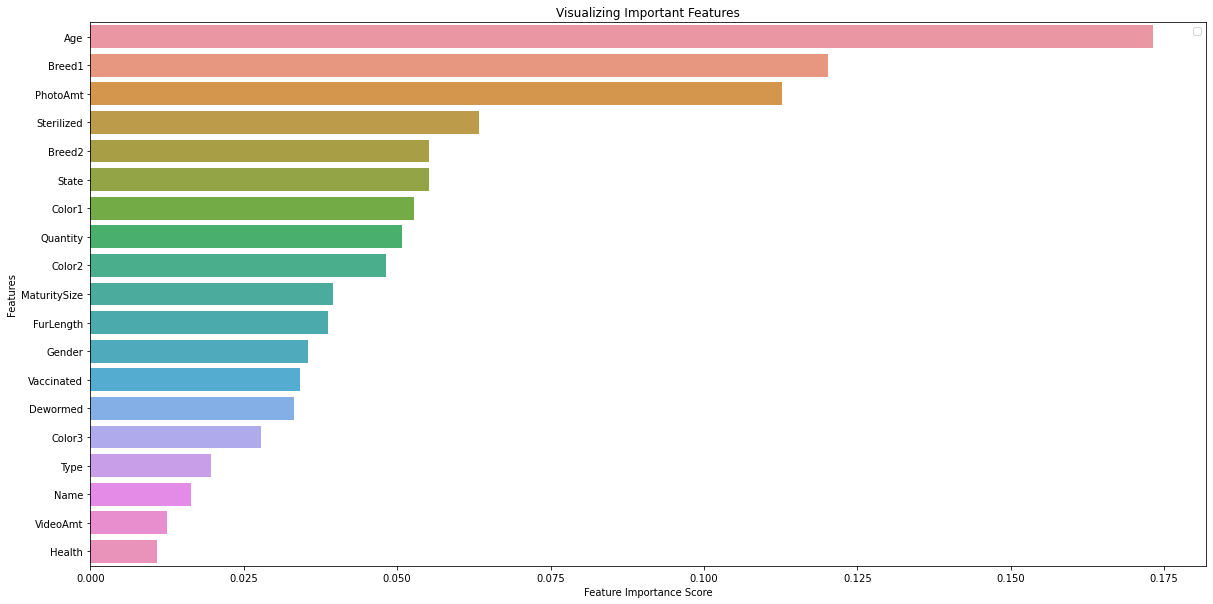

In [172]:
feature_imp = pd.Series(clf.feature_importances_,index=feature_names).sort_values(ascending=False)
%matplotlib inline
# Creating a bar plot
plt.figure(figsize=(20,10))
sns.barplot(x=feature_imp, y=feature_imp.index)
# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.legend()
plt.show()

***The model that is fitted on non one-hot encoded data outperforms the models fitted on encoded data by a consitently large margin (~4-5%). This is due to the inner dynamics of tree-bases models when choosing splits. If a continuous variable is chosen for a split, then there would be a number of choices of values on which a tree can split and in most cases, the tree can grow in both directions. On the other hand for categorical variables, the trees generally tend to grow in one direction because at every split of a categorical variable there are only two values (0 or 1).***

In [190]:
#fit simple tree with top 4 features
df1 = df[["PhotoAmt", "Age","Breed1","Sterilized","AdoptionSpeed"]]
Ysimple1 = df1["AdoptionSpeed"]
Xsimple1 = df1.drop(columns=["AdoptionSpeed"])
X_train1, X_test1, y_train1, y_test1 = train_test_split(Xsimple1, Ysimple1, test_size=0.3,random_state=4)

In [228]:
param_grid = {'bootstrap': [True],
              'max_depth': [5,6,7,8,9,10,30,50],
              'max_features': ['auto', 'sqrt', 'log2'],
              'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800],
              'criterion':['gini','entropy']}
clf = GridSearchCV(RandomForestClassifier(), param_grid,cv=5,n_jobs=4)
clf.fit(X_train1,y_train1)
best_params = clf.best_params_

In [229]:
best_params

{'bootstrap': True,
 'criterion': 'gini',
 'max_depth': 7,
 'max_features': 'sqrt',
 'n_estimators': 800}

In [230]:
clf=RandomForestClassifier(bootstrap=True,max_depth=7,max_features='sqrt',n_estimators=800,criterion='gini')
clf.fit(X_train1,y_train1)
Ypred1=clf.predict(X_test1)
print("Accuracy:",metrics.accuracy_score(y_test1, Ypred1))
print("Quadratic Kappa Score:",cohen_kappa_score(y_test1, Ypred1,weights='quadratic'))

Accuracy: 0.37905735882614494
Quadratic Kappa Score: 0.2963047909323312


***The conclusion is that even though our models perform better with non-one hot encoded data it is invalid to take these results. Although decision tree implementations can inherently handle categorical data, our data is not ordinal hence we cannot split certain variables such as colour,breed etc. without one-hot encoding (more indepth explanation in the report).***

## One-hot encoding, with advanced feature selection and boosting
### Feature selection v no feature selection etc.
One hot encoding doesn't work well with categorical vriables with lots of levels. Without one-hot encoding decision trees and random forest regression don't make sense as the categorical variables are not ordinal. In this section we will try to boost mdoel performance by trimming variables of low importance as well as boosting methods.

In [13]:
#feature selection
startloc=df_transformed.columns.get_loc("Breed1_15")
endloc=df_transformed.columns.get_loc("Breed2_307")
df_nobreed=df_transformed.drop(df_transformed.columns[startloc:endloc+1], axis=1)

In [14]:
df_nobreed

,Name,Age,Quantity,VideoAmt,PhotoAmt,AdoptionSpeed,RescuerID_Count,is_age_0_3,is_age_3_6,is_age_6_12,...,Color2_2,Color2_3,Color2_4,Color2_5,Color2_6,Color3_3,Color3_4,Color3_5,Color3_6,Color3_7
0,1,1,1,0,7.0,1,12,1,0,0,...,0,1,0,0,0,0,0,1,0,0
1,1,2,1,0,5.0,1,12,1,0,0,...,1,0,0,0,0,0,0,1,0,0
2,1,1,1,0,5.0,0,12,1,0,0,...,0,1,0,0,0,0,0,0,0,1
3,1,2,1,0,5.0,0,12,1,0,0,...,0,1,0,0,0,0,0,0,0,1
4,1,1,1,0,5.0,1,12,1,0,0,...,0,1,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1352,1,1,1,0,6.0,1,1,1,0,0,...,0,0,1,0,0,0,0,0,0,1
1353,1,11,2,0,1.0,4,1,0,0,1,...,1,0,0,0,0,0,0,0,0,1
1354,1,1,9,0,5.0,2,1,1,0,0,...,1,0,0,0,0,0,0,0,0,1
1355,1,3,1,0,3.0,0,1,1,0,0,...,0,0,0,0,1,0,0,0,0,1


In [15]:
#training and testing sets
Y_nobreed = df_nobreed["AdoptionSpeed"]
X_nobreed = df_nobreed.drop(columns=["AdoptionSpeed"])
X_train, X_test, y_train, y_test = train_test_split(X_nobreed, Y_nobreed, test_size=0.3,random_state=4,stratify=Y_nobreed)

In [16]:
#fitting decision tree
param_grid = {'max_depth':range(1,10),  
              'criterion': ['gini','entropy'], 
              'max_features':range(1,63)}
clf = GridSearchCV(tree.DecisionTreeClassifier(), param_grid,cv=5,n_jobs=4,scoring=kappa_scorer)
clf.fit(X_train,y_train)
print("CV Quadratic Kappa Score:",clf.best_score_)
print("Best parameters:",clf.best_params_)

CV Quadratic Kappa Score: 0.2292420410864863
Best parameters: {'criterion': 'gini', 'max_depth': 5, 'max_features': 40}


In [17]:
#test set scoring
y_pred=clf.predict(X_test)
print("Quadratic Kappa Score:",cohen_kappa_score(y_test, y_pred,weights='quadratic'))

Quadratic Kappa Score: 0.19595684977540184


In [18]:
#fitting random forest
param_grid = {'bootstrap': [True],
              'max_depth': [5,6,7,8,9,10,30,50],
              'max_features': ['auto', 'sqrt', 'log2'],
              'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800],
              'criterion':['gini','entropy']}
clf = GridSearchCV(RandomForestClassifier(), param_grid,cv=5,n_jobs=4,scoring=kappa_scorer)
clf.fit(X_train,y_train)
print("CV Quadratic Kappa Score:",clf.best_score_)
print("Best parameters:",clf.best_params_)

CV Quadratic Kappa Score: 0.25258977615164363
Best parameters: {'bootstrap': True, 'criterion': 'gini', 'max_depth': 9, 'max_features': 'auto', 'n_estimators': 100}


In [19]:
#test set scoring
y_pred=clf.predict(X_test)
print("Quadratic Kappa Score:",cohen_kappa_score(y_test, y_pred,weights='quadratic'))

Quadratic Kappa Score: 0.24942918425240423


No handles with labels found to put in legend.


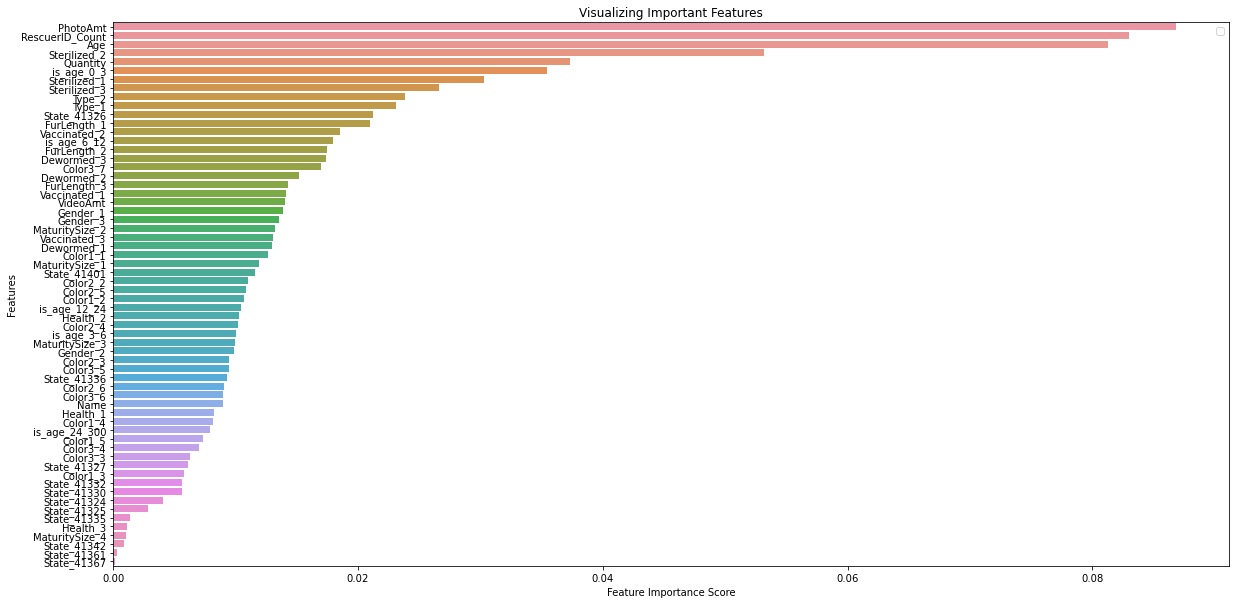

In [20]:
clf = RandomForestClassifier(bootstrap=True,criterion='gini',max_depth=5,max_features='log2',n_estimators=300)
clf.fit(X_train,y_train)
feature_names = list(X_train.columns)

feature_imp = pd.Series(clf.feature_importances_,index=feature_names).sort_values(ascending=False)
%matplotlib inline
plt.figure(figsize=(20,10))
sns.barplot(x=feature_imp, y=feature_imp.index)
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.legend()
plt.show()

***Notes***  
Fitting decision trees and RF models on data that has undergone feature selection performs marginally better with 5% points of increase in Quadratic Kappa score. Next we will try some tree boosting methods to see if they yield better baseline results.

Alternatively we could keep fitting similar tree/RF models but perform more advanced feature selection. From the important features visualisaton above we can see "State" and "Colour" features are predominantly at the bottom with the least importance. 

## Gradient boosting methods: GradientBoostingClassifier()

In [22]:
from sklearn import ensemble
#using dataset with one-hot encoding and little to none feature selection
X_train, X_test, y_train, y_test = train_test_split(X_tr, Y_tr, test_size=0.3,random_state=4,stratify=Y_tr)

In [23]:
#fitting baseline model with default parameters
gb_clf = ensemble.GradientBoostingClassifier()
gb_clf.fit(X_train,y_train)
y_pred=gb_clf.predict(X_test)
print("Quadratic Kappa Score:",cohen_kappa_score(y_test, y_pred,weights='quadratic'))

Quadratic Kappa Score: 0.25738112631432075


In [24]:
#fitting gb model with tuning
param_grid = {'n_estimators': [1, 2, 4, 8, 16, 32, 64, 100, 200],
              'max_depth': [1,2,3,4,5,6,7,8,9,10], 
              'learning_rate': [1,0.5,0.25,0.1,0.05,0.01] }
gb_clf = GridSearchCV(ensemble.GradientBoostingClassifier(), param_grid,cv=5,n_jobs=4,scoring=kappa_scorer)
gb_clf.fit(X_train,y_train)
print("CV Quadratic Kappa Score:",gb_clf.best_score_)
print("Best parameters:",gb_clf.best_params_)

CV Quadratic Kappa Score: 0.2919698462795607
Best parameters: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 200}


In [25]:
#calculating kappa score on test data
y_pred = gb_clf.predict(X_test)
print("Test set Quadratic Kappa Score:",cohen_kappa_score(y_test,y_pred,weights='quadratic'))

Test set Quadratic Kappa Score: 0.22765001365453197


In [26]:
#using dataset with one-hot encoding and some feature selection (no-breeds)
X_train, X_test, y_train, y_test = train_test_split(X_nobreed, Y_nobreed, test_size=0.3,random_state=4,stratify=Y_nobreed)
gb_clf = ensemble.GradientBoostingClassifier()
gb_clf.fit(X_train,y_train)
y_pred=gb_clf.predict(X_test)
print("Quadratic Kappa Score:",cohen_kappa_score(y_test, y_pred,weights='quadratic'))

Quadratic Kappa Score: 0.24715556136794614


In [27]:
#fitting gb model with tuning and feature selected data
param_grid = {'n_estimators': [1, 2, 4, 8, 16, 32, 64, 100, 200],
              'max_depth': [1,2,3,4,5,6,7,8,9,10], 
              'learning_rate': [1,0.5,0.25,0.1,0.05,0.01] }
gb_clf = GridSearchCV(ensemble.GradientBoostingClassifier(), param_grid,cv=5,n_jobs=4,scoring=kappa_scorer)
gb_clf.fit(X_train,y_train)
print("CV Quadratic Kappa Score:",gb_clf.best_score_)
print("Best parameters:",gb_clf.best_params_)

CV Quadratic Kappa Score: 0.27927459711939195
Best parameters: {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 32}


***Baseline model works better with more predictors so we'll work with the full data set of one-hot encoded data***

## Gradient Boosting Model: XGBoost()

In [10]:
import xgboost as xgb
from xgboost import XGBClassifier
X_train, X_test, y_train, y_test = train_test_split(X_tr, Y_tr,random_state=42,stratify=Y_tr)

In [9]:
#fitting prelim model
clf_xgb = XGBClassifier(objective='multi:softmax',seed=42,num_class=4,use_label_encoder=False)
clf_xgb.fit(X_train,y_train)
y_pred=clf_xgb.predict(X_test)
print("Quadratic Kappa Score:",cohen_kappa_score(y_test, y_pred,weights='quadratic'))

[09:11:59] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Quadratic Kappa Score: 0.28976065713071797


In [10]:
#fitting hyperparameters for XGBoost
#first round
param_grid = {'max_depth': [2,4,6,8],
              'learning_rate': [0.2,0.1,0.05,0.01],
              'subsample': [0.5,0.7,0.9],
              'min_child_weight': [1,2],
              'colsample_bytree': [0.5,0.7,0.9],
              'n_estimators': [50,100,150,200,300]}
clf_xgb = GridSearchCV(XGBClassifier(objective='multi:softmax',seed=42,num_class=5,use_label_encoder=False), param_grid,cv=5,n_jobs=4,scoring=kappa_scorer)
clf_xgb.fit(X_train,y_train)
print("CV Quadratic Kappa Score:",clf_xgb.best_score_)
print("Best parameters:",clf_xgb.best_params_)

[10:08:14] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
CV Quadratic Kappa Score: 0.3104773705609396
Best parameters: {'colsample_bytree': 0.5, 'learning_rate': 0.1, 'max_depth': 4, 'min_child_weight': 1, 'n_estimators': 200, 'subsample': 0.7}


In [11]:
#fitting hyperparameters for XGBoost
#second round - exploring parameters that are on the 'edge' of first round or exploring parameters to the left and right of inital param 
param_grid = {'max_depth': [3,4,5],
              'learning_rate': [0.1,0.08,0.06],
              'subsample': [0.6,0.7,0.8],
              'min_child_weight': [1],
              'colsample_bytree': [0.5,0.6],
              'n_estimators': [100,150,200,250]}
clf_xgb = GridSearchCV(XGBClassifier(objective='multi:softmax',seed=42,num_class=5), param_grid,cv=5,n_jobs=4,scoring=kappa_scorer)
clf_xgb.fit(X_train,y_train)
print("Best parameters:",clf_xgb.best_params_) 
print("CV Quadratic Kappa Score:",clf_xgb.best_score_)

C:\Users\trukg\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[11:19:16] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Best parameters: {'colsample_bytree': 0.5, 'learning_rate': 0.06, 'max_depth': 5, 'min_child_weight': 1, 'n_estimators': 200, 'subsample': 0.7}
CV Quadratic Kappa Score: 0.3114440018472825


In [12]:
#calculating kappa score on test data
y_pred = clf_xgb.predict(X_test)
print("Test set Quadratic Kappa Score:",cohen_kappa_score(y_test,y_pred,weights='quadratic'))

Test set Quadratic Kappa Score: 0.2409469119887495


In [11]:
#fitting hyperparameters for XGBoost
#last round - exploring parameters that are inbetween initial picks
param_grid = {'max_depth': [3,4,5],
              'learning_rate': [0.08,0.06],
              'subsample': [0.6,0.7],
              'min_child_weight': [1],
              'colsample_bytree': [0.5,0.6],
              'n_estimators': [150,200,250]}
clf_xgb = GridSearchCV(XGBClassifier(objective='multi:softmax',seed=42,num_class=5,eval_metric='merror'), param_grid,cv=5,n_jobs=4,scoring=kappa_scorer)
clf_xgb.fit(X_train,y_train)
print("Best parameters:",clf_xgb.best_params_) 
print("CV Quadratic Kappa Score:",clf_xgb.best_score_)

C:\Users\trukg\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


Best parameters: {'colsample_bytree': 0.5, 'learning_rate': 0.06, 'max_depth': 5, 'min_child_weight': 1, 'n_estimators': 200, 'subsample': 0.7}
CV Quadratic Kappa Score: 0.3114440018472825


***XGBoost performs much better, however gridsearchCV was considerably more computationally expensive***